## Buildings' Energy Prediction 

- Understanding the Problem Statement
- Data Collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose best model

## 1. Problem statement
This project is specifically designed for studying the energy efficiency of buildings. This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

## 2. Data collection
source: https://archive.ics.uci.edu/dataset/242/energy+efficiency

### 2.1 Import Data and Required Packages

In [1]:
pip install ucimlrepo shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.1 kB 487.6 kB/s eta 0:00:01
   ------- ------------------------------- 92.2/456.1 kB 871.5 kB/s eta 0:00:01
   ------- ------------------------------- 92.2/456.1 kB 871.5 kB/s eta 0:00:01
   ----------- -------------------------- 143.4/456.1 kB 655.8 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.1 kB 701.4 kB/s eta 0:00:01
   -------------------- ----------------- 245.8/456.1 kB 752.5 kB/s eta 0:00:01
   ----------------------- -------------- 276.5/456.1 kB 710.0 kB/s eta 0

In [1]:
# GENERAL
import warnings

# DATA
from ucimlrepo import fetch_ucirepo

# DATA Processing
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# SHAP
import shap

### 2.2 Data Loading

In [3]:
def load_data_from_uci(id_code):

  # fetch dataset
  uci_data = fetch_ucirepo(id=id_code)

  # data (as pandas dataframes)
  input_features = uci_data.data.features
  target_feature = uci_data.data.targets
  metadata = uci_data.data.metadata
  variables_info = uci_data.data.variables

  return input_features, target_feature, metadata, variables_info

In [6]:
X, y, metadata, variables_info= load_data_from_uci(id_code=242)

In [8]:
X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [13]:
y.head(5)

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


### 2.3 Data Information

The dataset includes parameters related to the energy efficiency of residential buildings. The primary focus is on predicting two important aspects:

- Y1: Heating Load (HL): The amount of heat energy required to maintain a comfortable indoor temperature.
- Y2: Cooling Load (CL): The amount of cooling energy required to maintain a comfortable indoor temperature. Attributes

The dataset contains eight input variables that describe various physical and architectural properties of the buildings. These are:

- X1: Relative Compactness: Ratio of the building’s volume to its envelope area.
- X2: Surface Area: Total exterior surface area of the building.
- X3: Wall Area: Total area of the building’s walls.
- X4: Roof Area: Total area of the building’s roof.
- X5: Overall Height: Height of the building.
- X6: Orientation: Direction the building faces (North, South, East, West).
- X7: Glazing Area: Total area of windows in the building.
- X8: Glazing Area Distribution: Distribution of the glazing area among the four facades.

In [29]:
X_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

y_mapping = {
    'Y1': "Heating Load (HL)",
    'Y2': "Cooling Load (CL)"
}

X.rename(columns=X_mapping, inplace=True)
y.rename(columns=y_mapping, inplace=True)


In [33]:
X.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0


In [37]:
y.head(20)

,Heating Load (HL),Cooling Load (CL)
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
5,21.46,25.38
6,20.71,25.16
7,19.68,29.60
8,19.50,27.30
9,19.95,21.97


## 3. Data checks to perform
- Check data shape
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check data shape

In [10]:
X.shape

(768, 8)

In [19]:
y.shape

(768, 2)

### 3.2 Check missing values

In [17]:
X.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64

In [18]:
y.isna().sum()

Y1    0
Y2    0
dtype: int64

### 3.3 Check duplicates

In [20]:
X.duplicated().sum()

0

### 3.4 Check data type

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      768 non-null    float64
 1   Y2      768 non-null    float64
dtypes: float64(2)
memory usage: 12.1 KB


### 3.4 Check statistics of data set

In [12]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [15]:
y.describe()

,Y1,Y2
count,768.000000,768.000000
mean,22.307201,24.587760
std,10.090196,9.513306
min,6.010000,10.900000
25%,12.992500,15.620000
50%,18.950000,22.080000
75%,31.667500,33.132500
max,43.100000,48.030000


### 3.5 Check the number of unique values of each column

In [28]:
X.nunique()

Relative Compactness         12
Surface Area                 12
Wall Area                     7
Roof Area                     4
Overall Height                2
Orientation                   4
Glazing Area                  4
Glazing Area Distribution     6
dtype: int64

Apparently all the features are categorical

In [34]:
y.nunique()

Heating Load (HL)    586
Cooling Load (CL)    636
dtype: int64

### 3.6 Check various categories present in the different categorical column

In [36]:
categorical_columns = ['Relative Compactness', 'Surface Area','Wall Area','Roof Area', 'Overall Height', 
                       'Orientation','Glazing Area','Glazing Area Distribution']
for i in categorical_columns:
    unique_value = X[i].unique()
    print(f'{len(unique_value)} Categories in {i} variable: {unique_value}')

12 Categories in Relative Compactness variable: [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
12 Categories in Surface Area variable: [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
7 Categories in Wall Area variable: [294.  318.5 343.  416.5 245.  269.5 367.5]
4 Categories in Roof Area variable: [110.25 122.5  147.   220.5 ]
2 Categories in Overall Height variable: [7.  3.5]
4 Categories in Orientation variable: [2 3 4 5]
4 Categories in Glazing Area variable: [0.   0.1  0.25 0.4 ]
6 Categories in Glazing Area Distribution variable: [0 1 2 3 4 5]


Conclusion:
- No missing values
- 8 features and 2 targets
- 768 rows (buildings)
- Regression & classification methods
- Variety of number is high -> scale the data


Determination of cat and num values in the features:

- Relative Compactness:
These values appear to represent a continuous scale (0.98 to 0.62). You should treat them as numerical variables because they likely represent a specific measure of building compactness.

- Surface Area, Wall Area, Roof Area:
These variables have a small number of unique values but represent physical dimensions (in square meters). They should be treated as numerical variables because they represent measurements.

- Overall Height:
With only 2 unique values (7.0 and 3.5), this might represent categorical information about building height categories. However, since these are actual measurements (in meters), it might be reasonable to treat them as numerical unless there's a categorical context (like height categories).

- Orientation, Glazing Area, Glazing Area Distribution:
These variables have a small number of unique values (4 to 6), suggesting they might represent categories or levels rather than continuous measurements. Therefore, they should be treated as categorical variables. You would typically use techniques like one-hot encoding to prepare them for modeling.

- Heating Load (HL) and Cooling Load (CL):
These are numerical variables representing the amount of energy required for heating and cooling, respectively. They should be treated as numerical variables because you are predicting continuous quantities (energy load).

Summary:
- Numerical Variables: Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height (if treated as numerical), Heating Load (HL), Cooling Load (CL).

- Categorical Variables: Orientation, Glazing Area, Glazing Area Distribution. These should be encoded appropriately (e.g., one-hot encoding) before applying machine learning algorithms.

## 4. Exploratory Data Analysis

In [57]:
df = pd.concat([X,y], axis=1)
df.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load (HL),Cooling Load (CL)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [66]:
num_features = df.drop(['Orientation', 'Glazing Area Distribution'], axis=1)
cat_features = df[['Orientation', 'Glazing Area Distribution']]
cat_features

,Orientation,Glazing Area Distribution
0,2,0
1,3,0
2,4,0
3,5,0
4,2,0
...,...,...
763,5,5
764,2,5
765,3,5
766,4,5


### 4.1 Distribution

In [67]:
num_features.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area', 'Heating Load (HL)',
       'Cooling Load (CL)'],
      dtype='object')

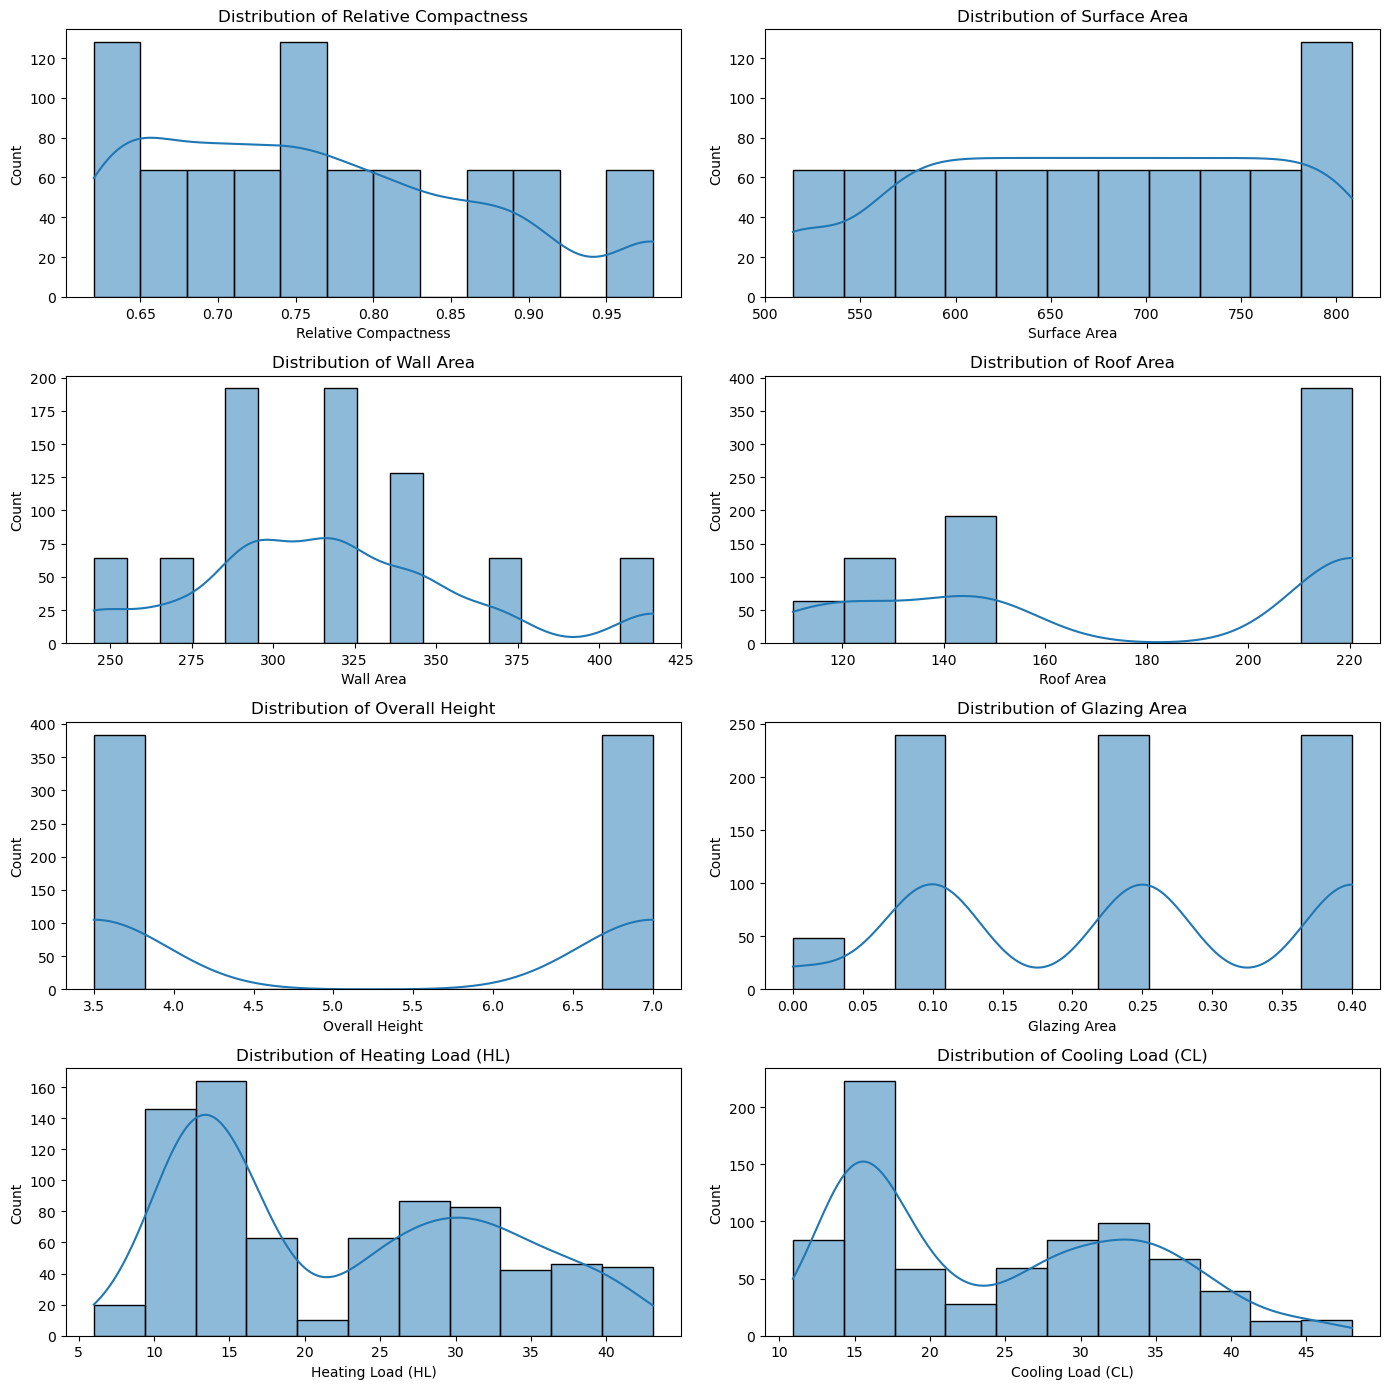

In [97]:

# Create the subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 14))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot
for i, column in enumerate(num_features.columns):
    sns.histplot(data=num_features, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

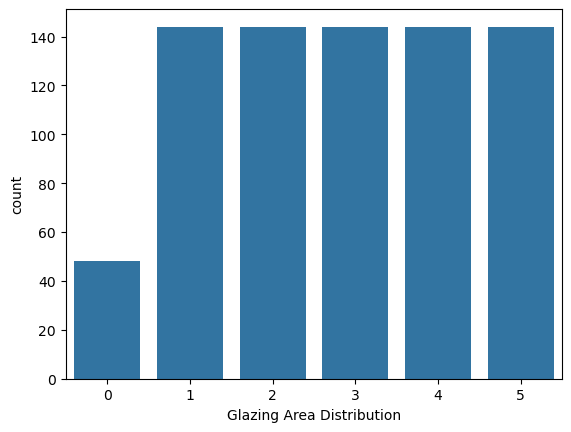

In [62]:
sns.countplot(data=cat_features, x='Glazing Area Distribution')
plt.show()

### 4.2 Relationships Between Variables

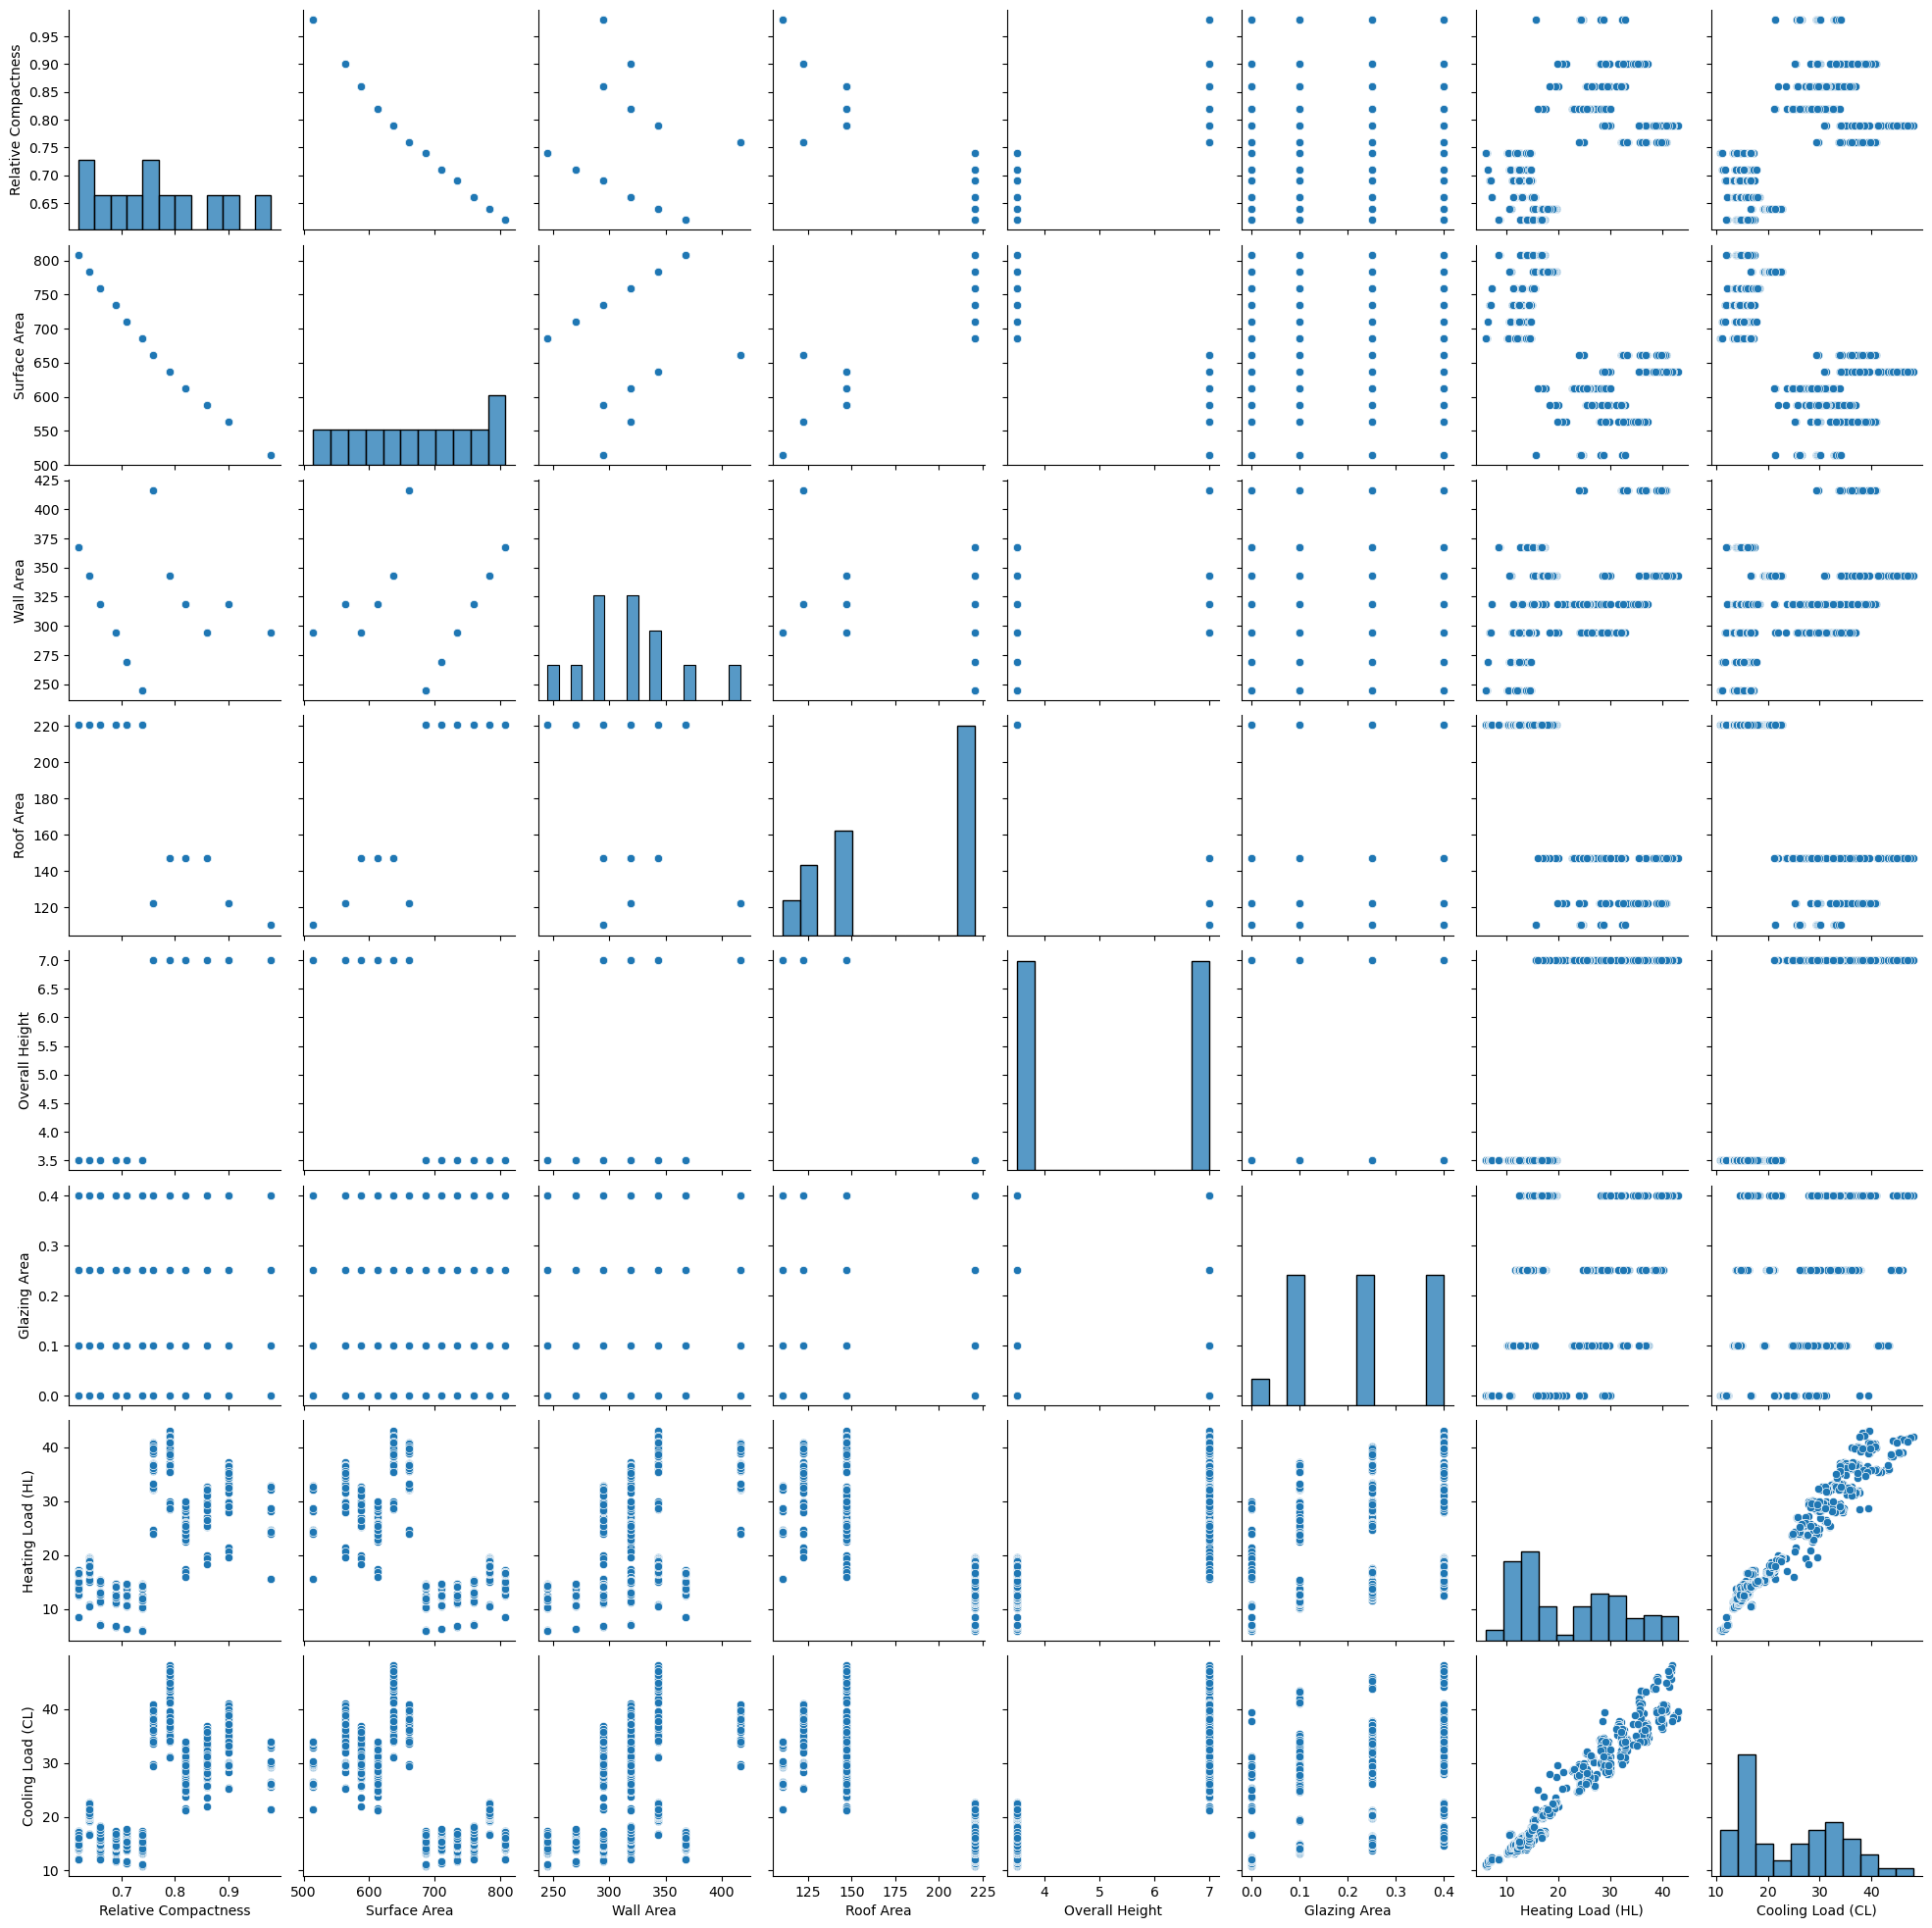

In [110]:
sns.pairplot(num_features)
plt.show()

anomaly:
- a larger glazed area leads to higher heating and cooling load -> the glazing isnt working properly? or maybe due to another factors

### 4.3 Feature Engineering Insights

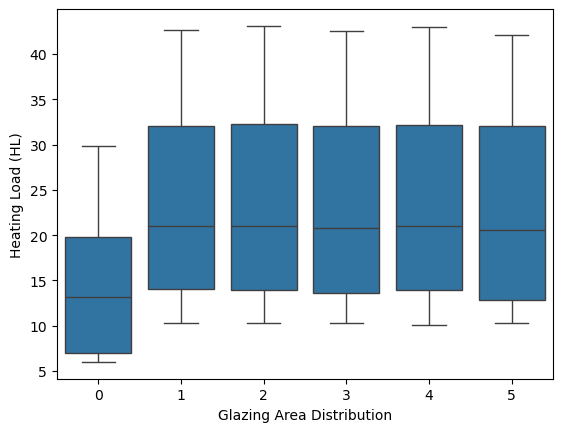

In [103]:
sns.boxplot(data=df, x='Glazing Area Distribution', y='Heating Load (HL)')
plt.show()

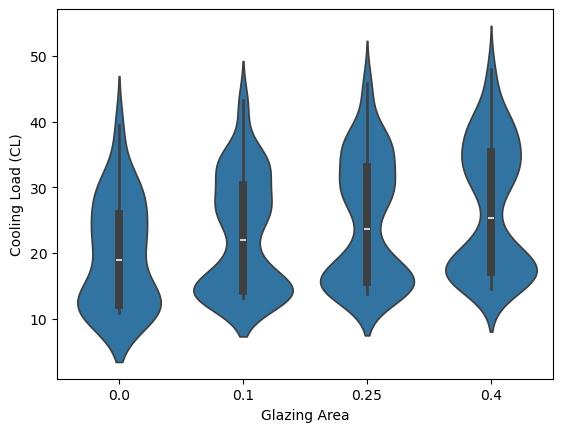

In [101]:
sns.violinplot(data=df, x='Glazing Area', y='Cooling Load (CL)')
plt.show()

### 4.4 Target Variable Analysis

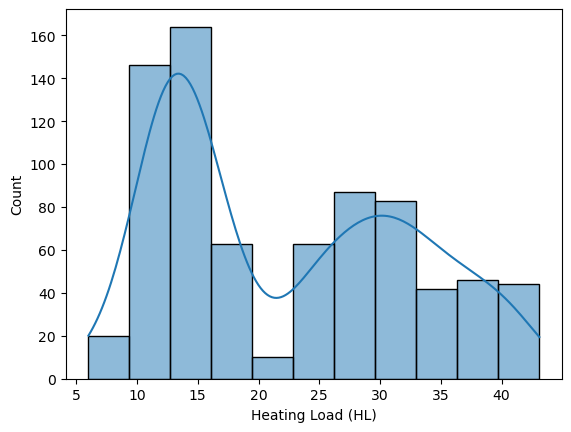

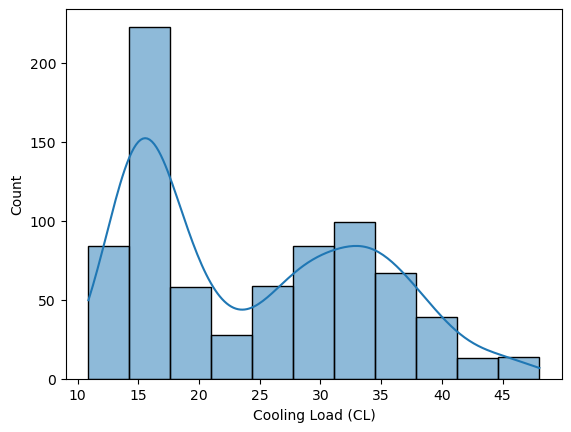

In [104]:
sns.histplot(df['Heating Load (HL)'], kde=True)
plt.show()

sns.histplot(df['Cooling Load (CL)'], kde=True)
plt.show()

### 4.5 Multivariate analysis

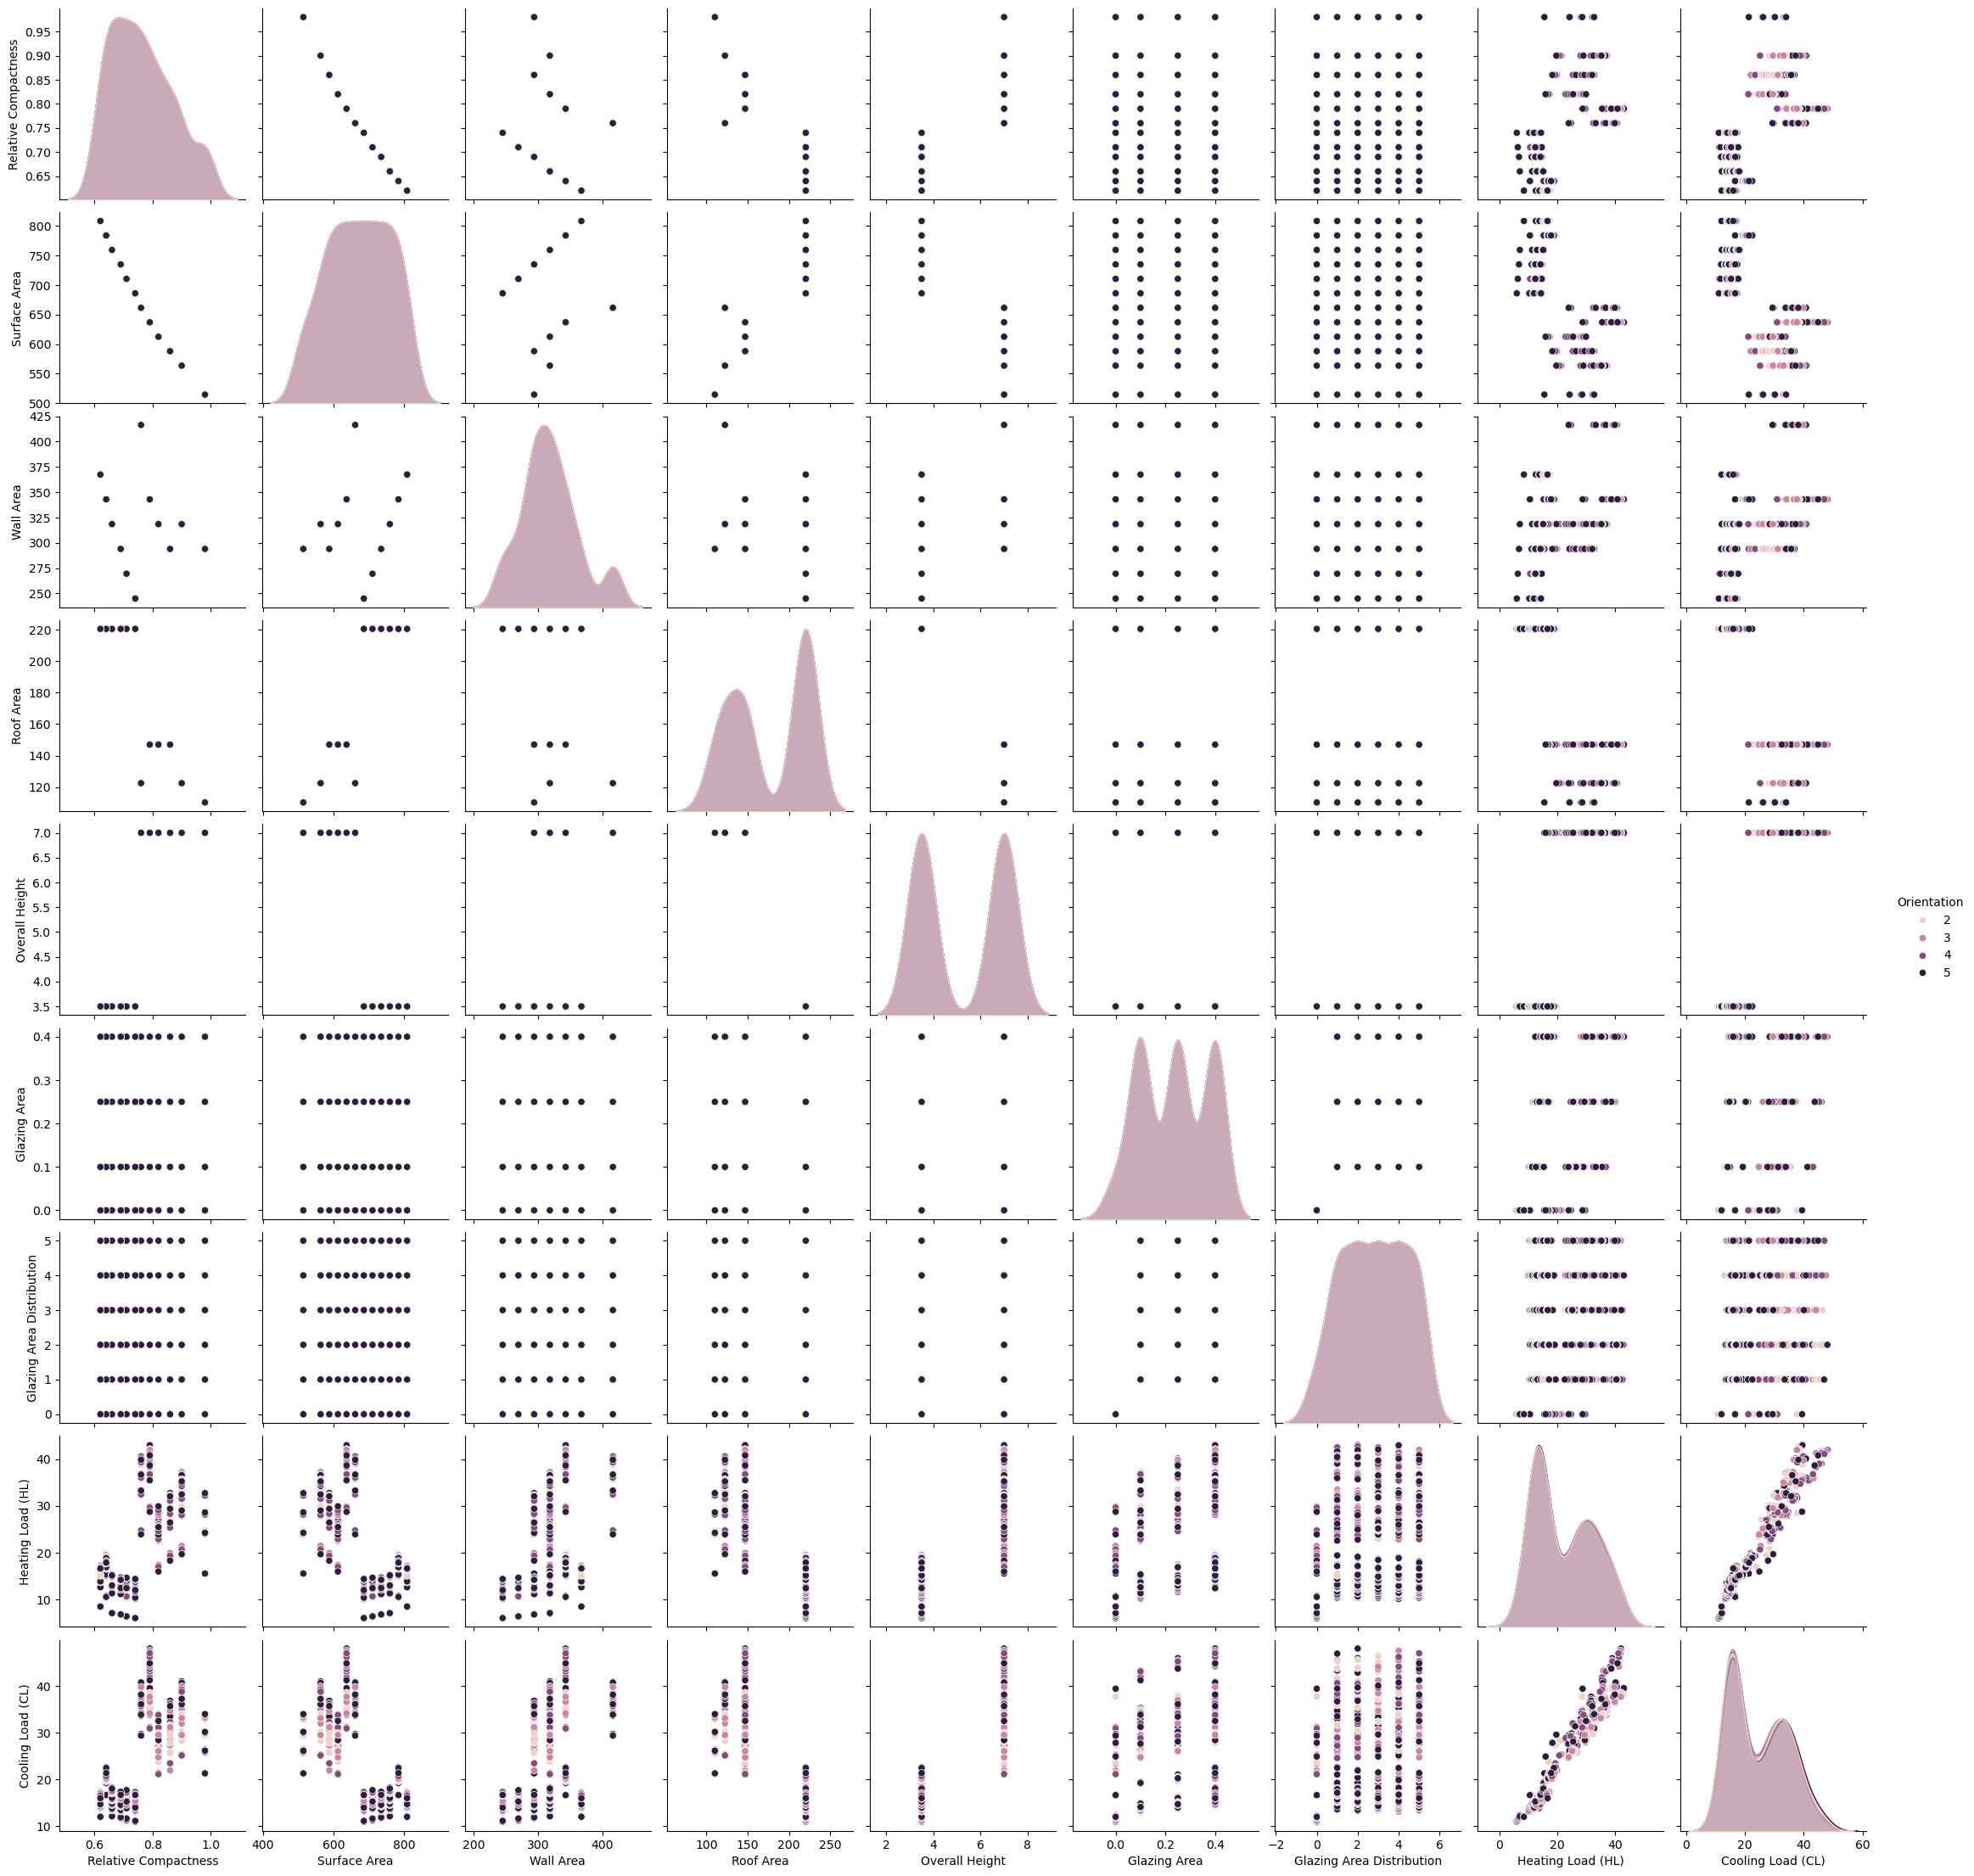

In [111]:
sns.pairplot(df,hue="Orientation")
plt.show()

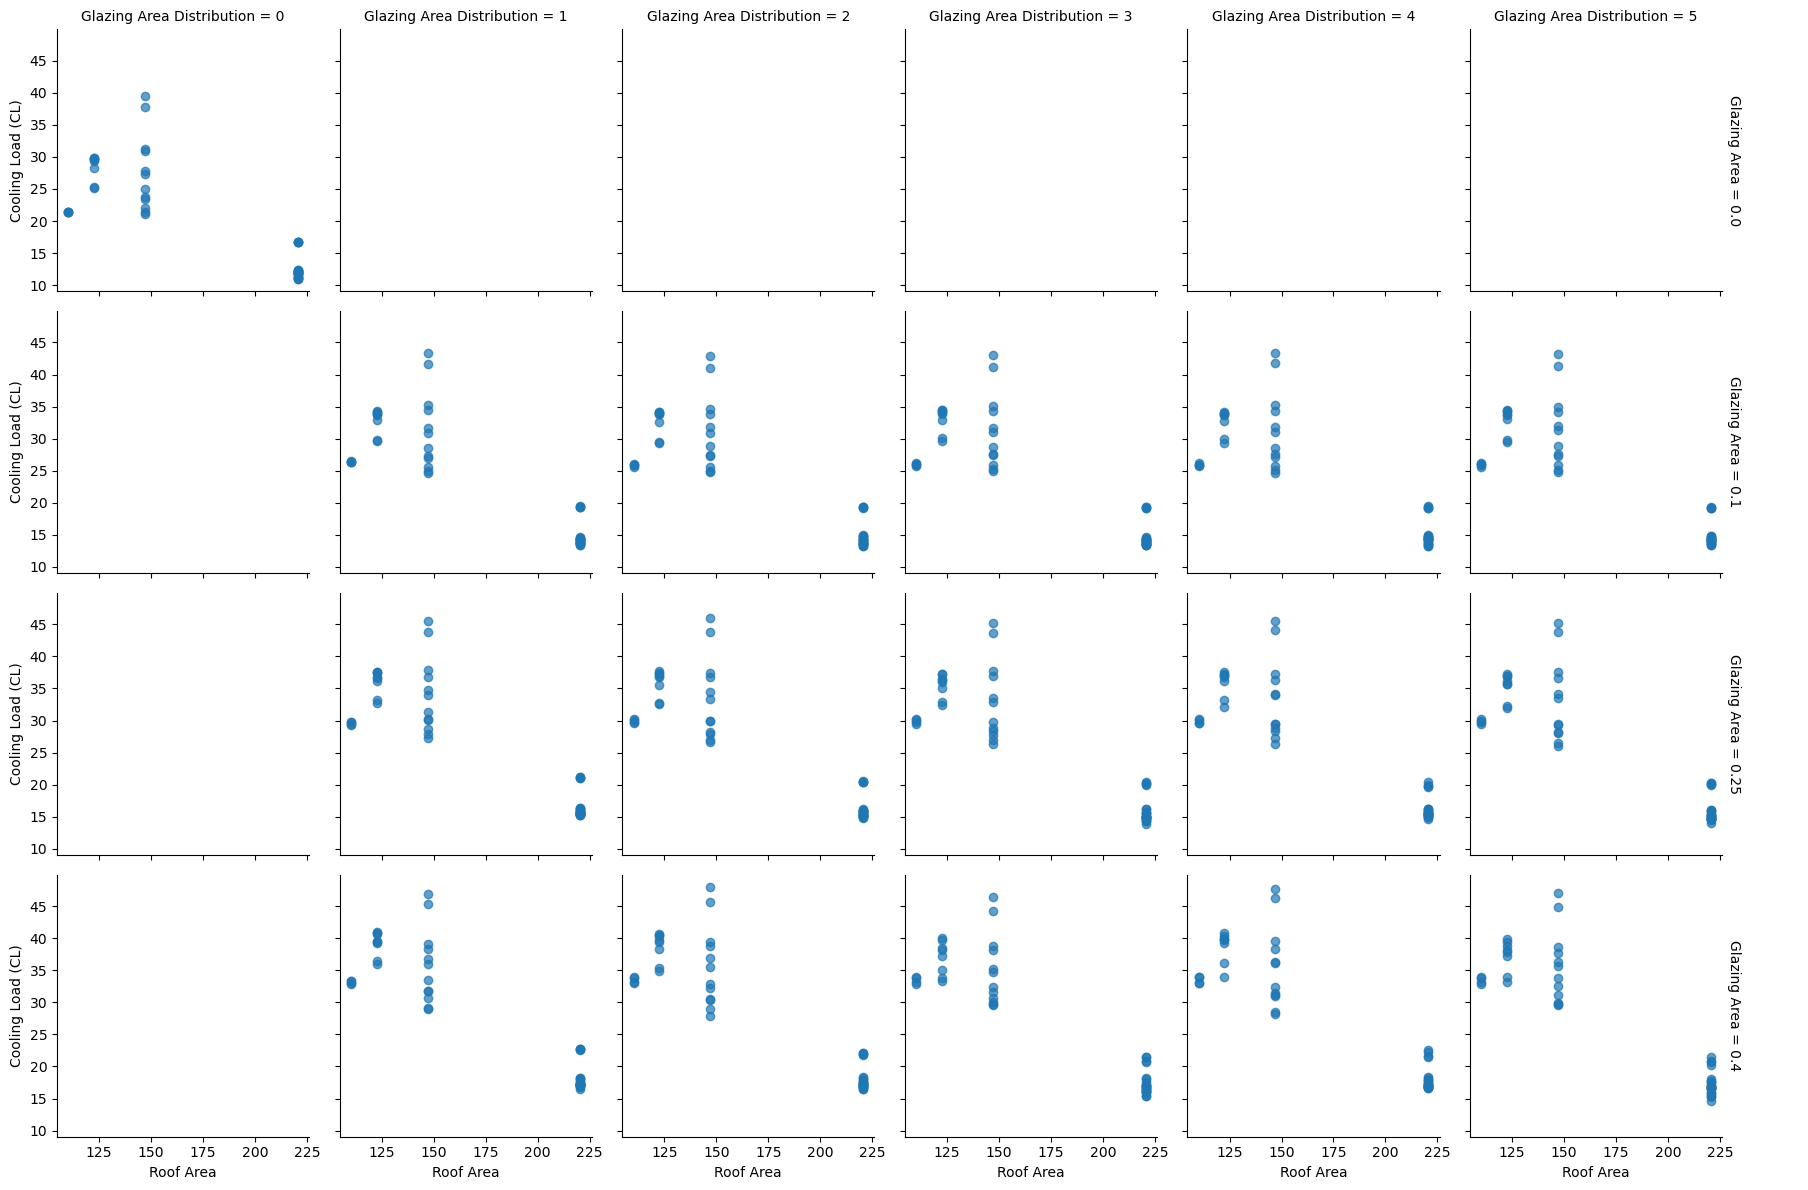

In [107]:
g = sns.FacetGrid(df, col="Glazing Area Distribution", row="Glazing Area", margin_titles=True)
g.map(plt.scatter, "Roof Area", "Cooling Load (CL)", alpha=.7)
g.add_legend()

Conclusion:
- linear relationship between two targets (HL&CL)
- hIGHER buildings tend to have higher CL and HL
- Higehr roof area usually have less CL and HL
- less compact building -> less CL and HL
- less surface building -> high CL and HL
- a larger glazed area leads to higher heating and cooling load (anomaly)
- 